# CLIMATE 405: Machine Learning for Earth and Environmental Sciences; FALL 2024
## Prof. Mohammed Ombadi (ombadi@umich.edu)

# Lecture 2 (Wednesday, 08/26/2024)
# Topics covered in this lecture:
- Probability Distributions
- Model Evaluation Metrics

## Import libraries

In [97]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import skew, kurtosis, norm, lognorm, genextreme


# Set the current working directory
os.chdir(sys.path[0])

## <center>Probability Distributions</center>

### What is a Probability Distribution?

It is a mathematical function that gives the probability of occurrence of a given outcome. In other words, a probability function is a mapping function from the sample space to the probability space. 

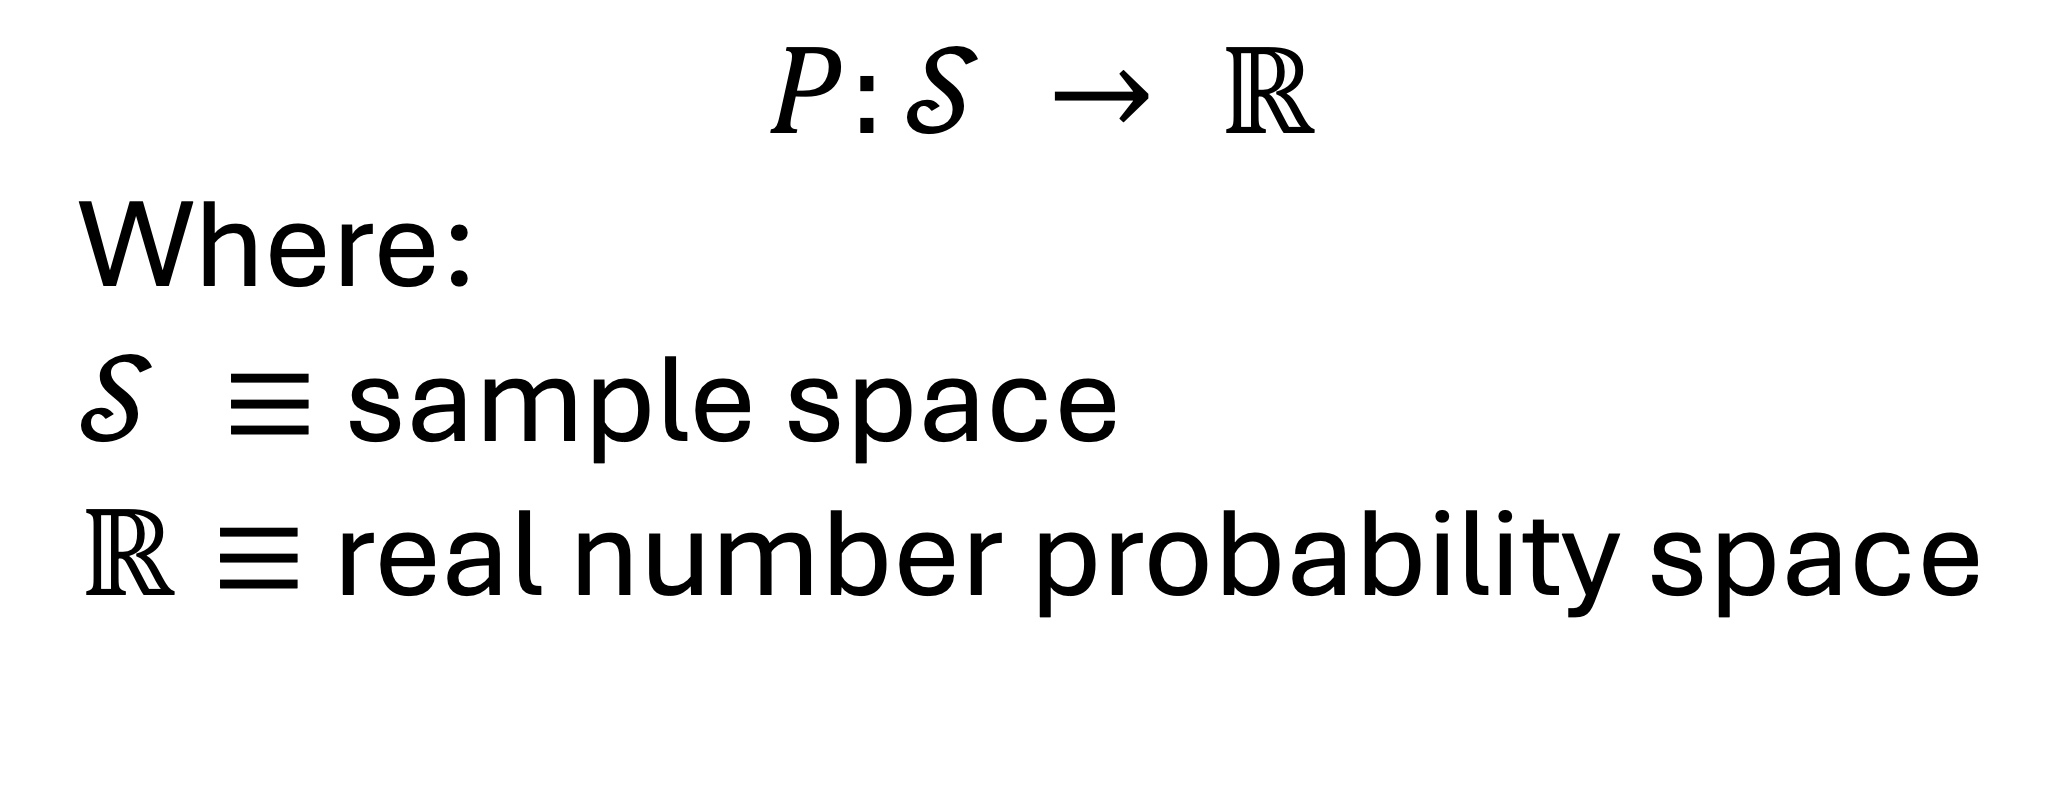

In [98]:
display(Image(filename = 'Probability_General Definition.png', width= 1000, height= 500))

### A Probability Distribution can be:

- Discrete
- Continous 

### Discrete Probability Distribution

An example of a discrete probability distribution is one that describes the process of tossing a coin

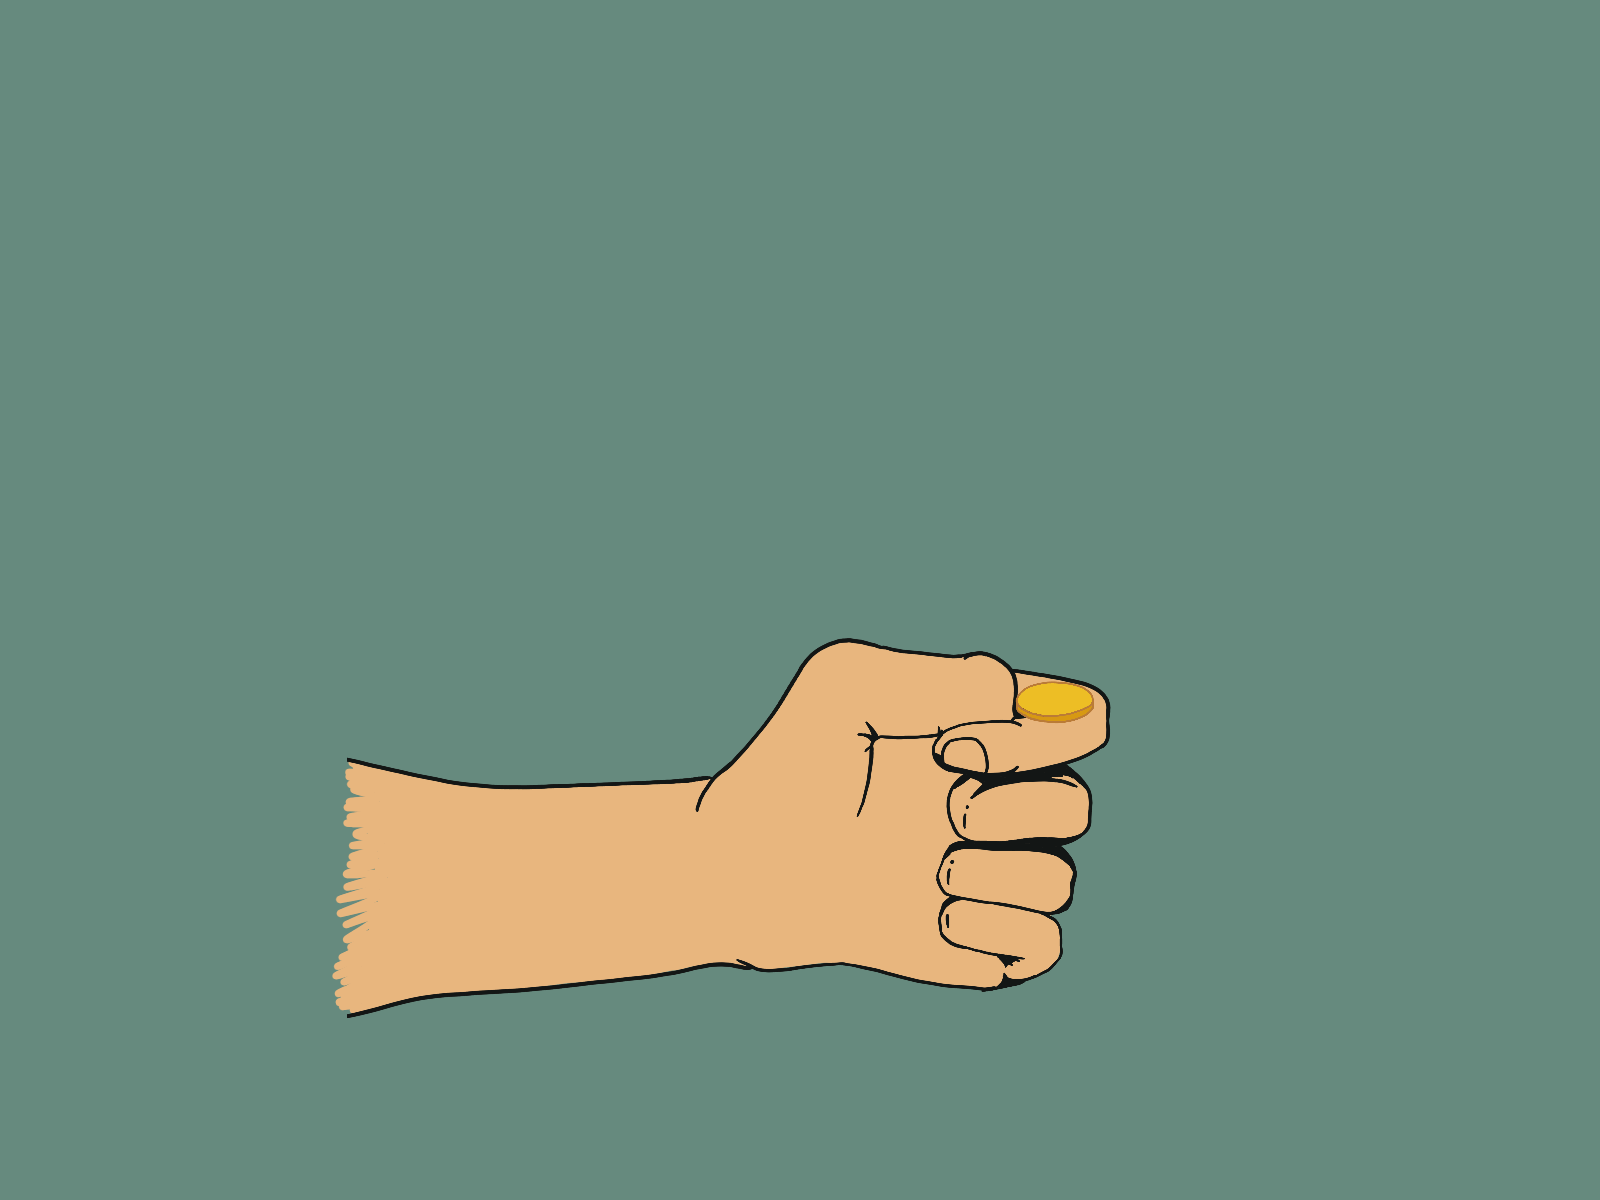

In [15]:
display(Image(filename = 'tossing_a coin.gif', width= 1000, height= 500))

- The sample space in this case is: S = {Heads, Tails}
- The probability distribution is P(S=H) = 0.5 and P(S=T) = 0.5

#### Another example of a discrete probability distribution is one that describes the outcome of rolling a dice

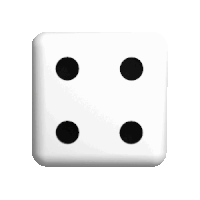

In [16]:
display(Image(filename = 'dice-game.gif', width= 400, height= 400))

#### What is the sample space (S)?

#### What is the probability distribution for this case?

### Continuous Probability Distributions

Unlike discrete probability distributions, here the sample space of the process outcome is continuous (for example, the real numbers space)
- Most of the random variables and processes that we will model in this class are described by a continuous probability distribution
- Examples include:

#### Normal Distribution

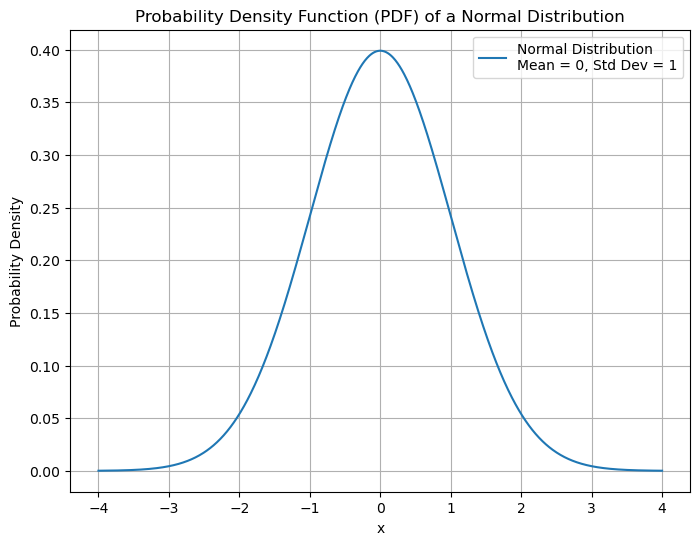

In [48]:
# Parameters for the normal distribution
mean = 0
std_dev = 1

# Generate a range of x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Compute the PDF values
pdf = norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Normal Distribution\nMean = {mean}, Std Dev = {std_dev}')
plt.title('Probability Density Function (PDF) of a Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### How well does the normal distribution model hydroclimatic variables:

Streamflow data - Huron River at Ann Arbor - Jan, 2023 - Dec, 2023

(array([362., 277.,  15.,   6.,   1.,   1.,   1.,   1.,   2.,   4.]),
 array([ 397. ,  702.3, 1007.6, 1312.9, 1618.2, 1923.5, 2228.8, 2534.1,
        2839.4, 3144.7, 3450. ]),
 <BarContainer object of 10 artists>)

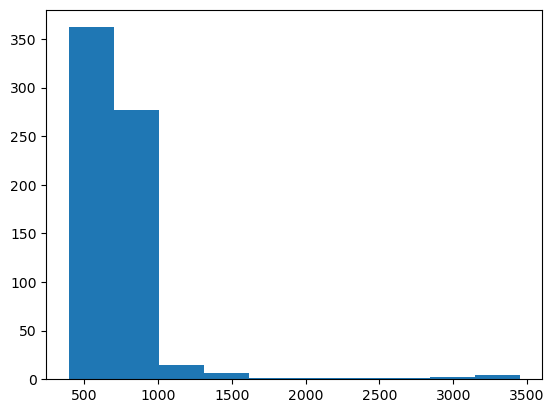

In [64]:
data = pd.read_csv('Huron_river_streamflowtxt.csv')
huron_flow = data['72359_00060'].values
#huron_flow
plt.hist(huron_flow)

### Other distributions that are more suitable for hydro-climatic variables: 

#### Log-normal

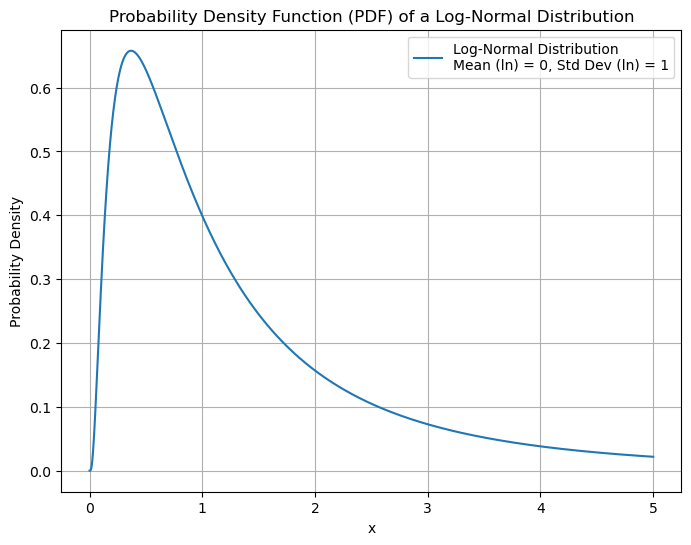

In [58]:
# Parameters for the log-normal distribution
mean = 0
std_dev = 1
sigma = std_dev  # Standard deviation of the underlying normal distribution

# Generate a range of x values
x = np.linspace(0, 5, 1000)  # Start from 0 because the log-normal distribution is defined for x > 0

# Compute the PDF values
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mean))

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Log-Normal Distribution\nMean (ln) = {mean}, Std Dev (ln) = {std_dev}')
plt.title('Probability Density Function (PDF) of a Log-Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Generalized Extreme Value distribution 

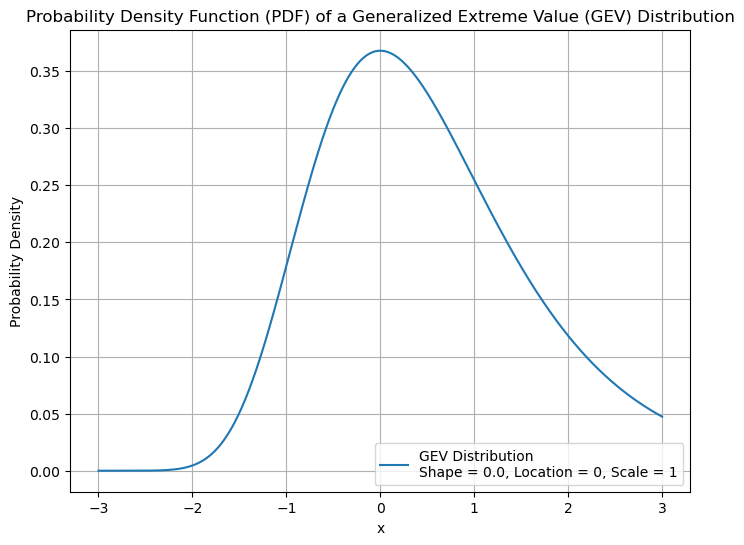

In [61]:
# Parameters for the GEV distribution
shape = 0.0  # Gumbel type (can be negative for Weibull, positive for Fréchet)
loc = 0      # Location parameter
scale = 1    # Scale parameter

# Generate a range of x values
x = np.linspace(-3, 3, 1000)

# Compute the PDF values
pdf = genextreme.pdf(x, c=shape, loc=loc, scale=scale)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'GEV Distribution\nShape = {shape}, Location = {loc}, Scale = {scale}')
plt.title('Probability Density Function (PDF) of a Generalized Extreme Value (GEV) Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## <center>Model Evaluation Metrics</center>

### <center>Metrics for continous variables</center>

#### Notations that we will use

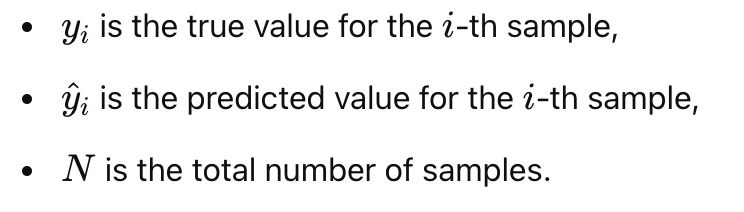

In [7]:
display(Image(filename = 'Notations.png', width= 400, height= 400))

#### 1- Mean Squared Errors (MSE)

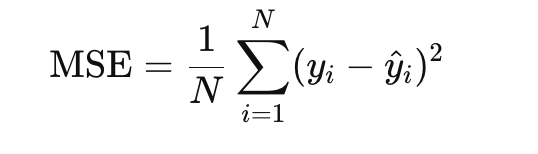

In [5]:
display(Image(filename = 'MSE.png', width= 400, height= 400))

#### 2- Root Mean Squared Errors (RMSE)

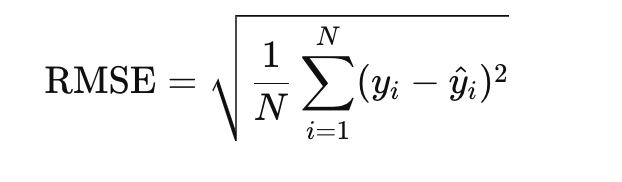

In [8]:
display(Image(filename = 'RMSE.png', width= 400, height= 400))

#### 3- Mean Absolute Errors (MAE)

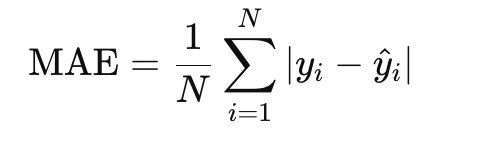

In [9]:
display(Image(filename = 'MAE.png', width= 400, height= 400))

#### 4- Bias

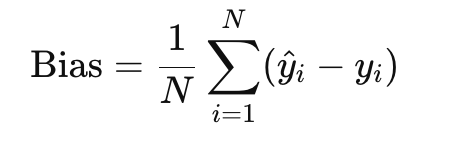

In [17]:
display(Image(filename = 'Bias.png', width= 400, height= 400))

#### 5- Relative Bias

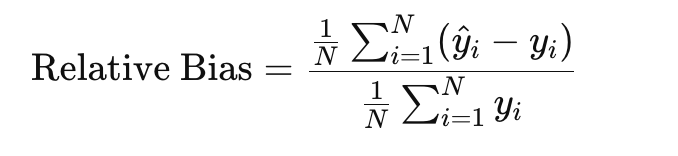

In [18]:
display(Image(filename = 'Relative Bias.png', width= 400, height= 400))

#### 6- Correlation Coefficient (CC)

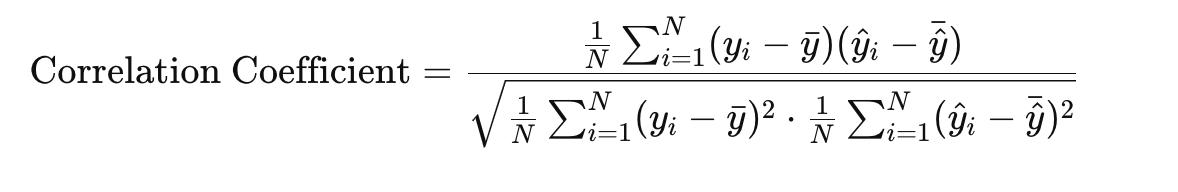

In [20]:
display(Image(filename = 'Correlation Coeff.png', width= 600, height= 600))

### <center>Metrics for Categorical variables</center>

#### 1- The Confusion Matrix

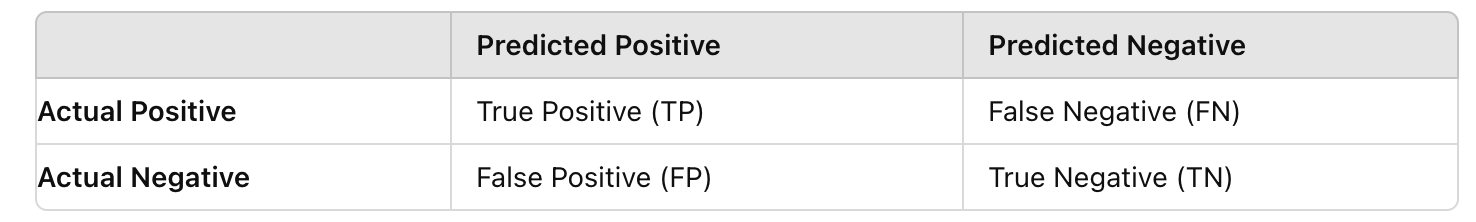

In [25]:
display(Image(filename = 'The Confusion Matrix.png', width= 800, height= 800))

Metrics that can be derived from the confusion matrix include:
- Accuracy
- Precision
- Recall
- F1 Score
- False Positive Rate
- False Negative Rate

#### 2- Binary Cross Entropy (We will cover this later in class)

### <center>Exercise (Model Evaluation Metrics)</center> 

Let's use the wind speed data from Lecture 1:

In [66]:
data = pd.read_csv('wind speed_Central Park_NY.csv')

In [67]:
obs = data['AWND'].values
obs
#plt.plot(np.arange(len(obs)), obs, '-')

array([2.7, 1.4, 1.7, 1.3, 0.7, 0.6, 1.8, 0.9, 1. , 1.4, 2.1, 0.6, 0.7,
       1.1, 1.1, 1.7, 1.3, 1.2, 1.3, 0.9, 1.2, 1.2, 1.8, 1.9, 1.3, 2.3,
       1.6, 1.7, 1.3, 1.3, 1.5])

Now, let's add some white noise to the data, to generate hypothetical predictions

In [68]:
pred = obs + np.random.normal(0,0.3,len(obs))

In [69]:
pred

array([2.81348567, 1.60345365, 1.4934391 , 1.57923638, 0.55879727,
       0.71054056, 2.1292609 , 1.53458088, 1.38218712, 1.11481527,
       1.93083283, 0.89574163, 0.52289472, 1.28825603, 0.90622361,
       1.81662824, 1.25462671, 0.8982863 , 1.34048755, 1.19976018,
       0.99950706, 0.88028979, 1.64424903, 1.83295367, 1.71553471,
       2.1520055 , 1.3029815 , 1.81723838, 1.21981188, 1.36298463,
       0.58347055])

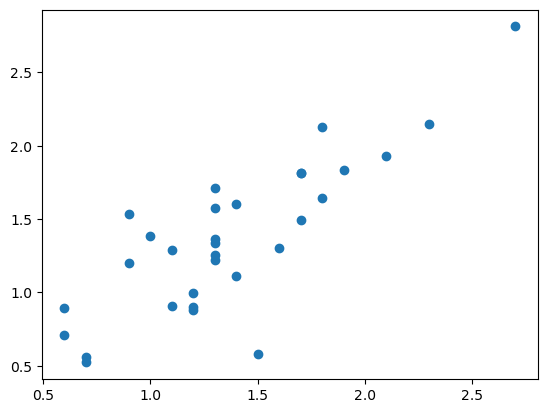

In [70]:
plt.plot(obs,pred,'o')

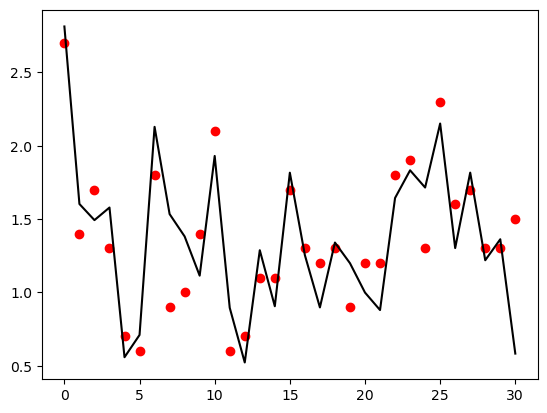

In [71]:
plt.plot(np.arange(len(obs)), obs, 'or', np.arange(len(pred)), pred, 'k')  

#### Let's compute evaluation metrics:

#### MSE

In [84]:
np.mean((obs - pred)**2)

0.08709677419354839

#### RMSE

In [85]:
np.sqrt(np.mean((obs - pred)**2))

0.2951216261027788

#### MAE

In [86]:
np.mean(abs(obs - pred))

0.24516129032258066

#### Bias

In [88]:
np.mean(obs-pred)

0.03870967741935485

#### Relative Bias

In [89]:
np.mean(obs-pred) / np.mean(obs)

0.028169014084507053

#### Correlation Coefficient

In [95]:
np.corrcoef(obs,pred)[0,1]

0.8188633214425401